In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
names = pd.read_csv('/Users/stellasotos/Desktop/Most_Popular_Baby_Names_by_Sex_and_Mother_s_Ethnic_Group__New_York_City.csv')

In [160]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22035 entries, 0 to 22034
Data columns (total 6 columns):
Year of Birth         22035 non-null int64
Gender                22035 non-null object
Ethnicity             22035 non-null object
Child's First Name    22035 non-null object
Count                 22035 non-null int64
Rank                  22035 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.0+ MB


In [161]:
names.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [162]:
names.describe()

,Year of Birth,Count,Rank
count,22035.000000,22035.000000,22035.000000
mean,2012.115589,34.512821,57.064670
std,1.170393,40.085777,25.452851
min,2011.000000,10.000000,1.000000
25%,2011.000000,13.000000,38.000000
50%,2012.000000,20.000000,59.000000
75%,2013.000000,36.000000,78.000000
max,2014.000000,426.000000,102.000000


In [163]:
#delete rank column... annoying
#del names["Rank"]

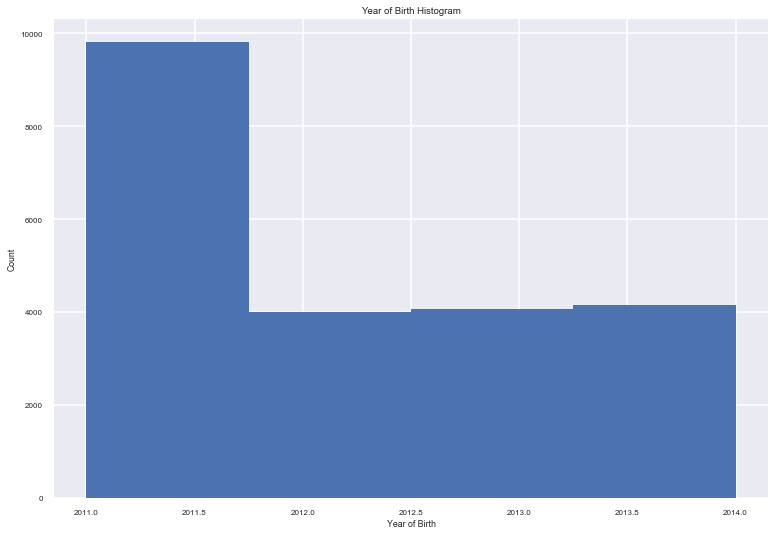

In [164]:
# plot the histogram
plt.hist(names['Year of Birth'], bins = 4)
# give the histogram a title
plt.title('Year of Birth Histogram')
# give the histogram an x-label
plt.xlabel('Year of Birth')
# give the histogram a y-label
plt.ylabel('Count')
# print the plot
plt.show()

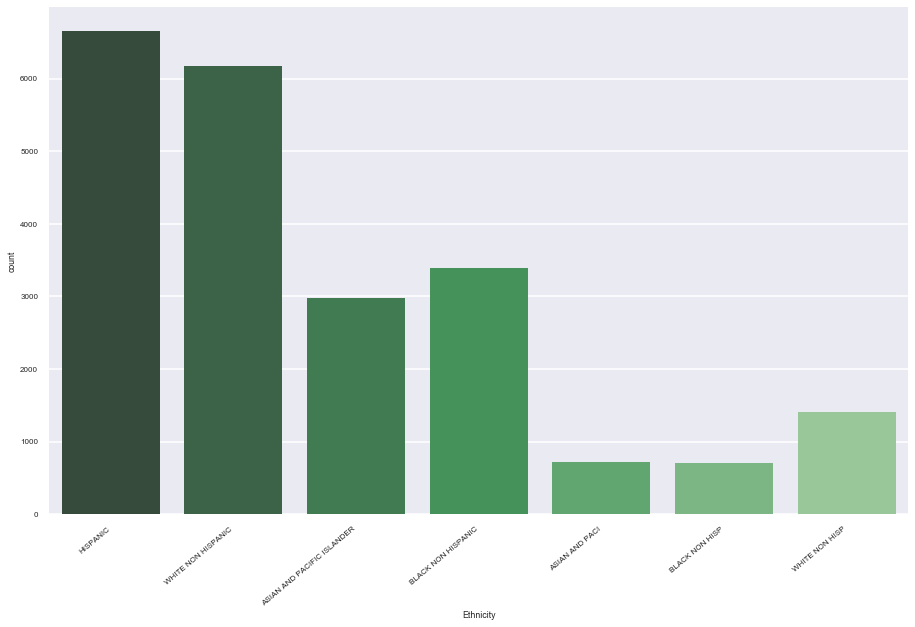

In [137]:
# plot the histogram
eth = sns.countplot(x="Ethnicity", data=names, palette="Greens_d");
eth.set_xticklabels(eth.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [165]:
#Clean-up Ethnicity Categories
names['Ethnicity'] = np.where(names['Ethnicity'] =="BLACK NON HISP", "BLACK NON HISPANIC", names['Ethnicity'])
names['Ethnicity'] = np.where(names['Ethnicity'] =="WHITE NON HISP", "WHITE NON HISPANIC",names['Ethnicity'])
names['Ethnicity'] = np.where(names['Ethnicity'] =="ASIAN AND PACI", "ASIAN AND PACIFIC ISLANDER",names['Ethnicity'])

In [166]:
#Clean-up Names capitalization
names["Child's First Name"]=names["Child's First Name"].apply(lambda x: x.upper())
names.groupby(["Year of Birth","Gender","Ethnicity","Child's First Name",])['Count'].sum()
names.sort_values(by="Child's First Name")


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
21549,2014,MALE,ASIAN AND PACIFIC ISLANDER,AAHIL,14,54
12956,2014,MALE,ASIAN AND PACIFIC ISLANDER,AAHIL,14,54
8202,2012,FEMALE,HISPANIC,AALIYAH,68,26
10212,2013,FEMALE,HISPANIC,AALIYAH,56,33
15072,2011,FEMALE,BLACK NON HISPANIC,AALIYAH,69,5
2766,2011,FEMALE,HISPANIC,AALIYAH,63,30
15762,2012,FEMALE,HISPANIC,AALIYAH,68,26
4266,2011,FEMALE,HISPANIC,AALIYAH,63,30
1110,2011,FEMALE,BLACK NON HISPANIC,AALIYAH,69,5
6229,2011,FEMALE,HISPANIC,AALIYAH,63,30


In [217]:
names_just_counts = names.groupby(["Child's First Name"])['Count'].sum()
d = {"Count":names_just_counts}
count_df = pd.DataFrame(d)
count_df=count_df.sort_values(by="Count",ascending = False)
count_df

,Count
Child's First Name,
JAYDEN,8316
ETHAN,7628
JACOB,7423
DANIEL,6622
SOPHIA,6370
MICHAEL,6365
ISABELLA,6359
MATTHEW,6260
DAVID,6080


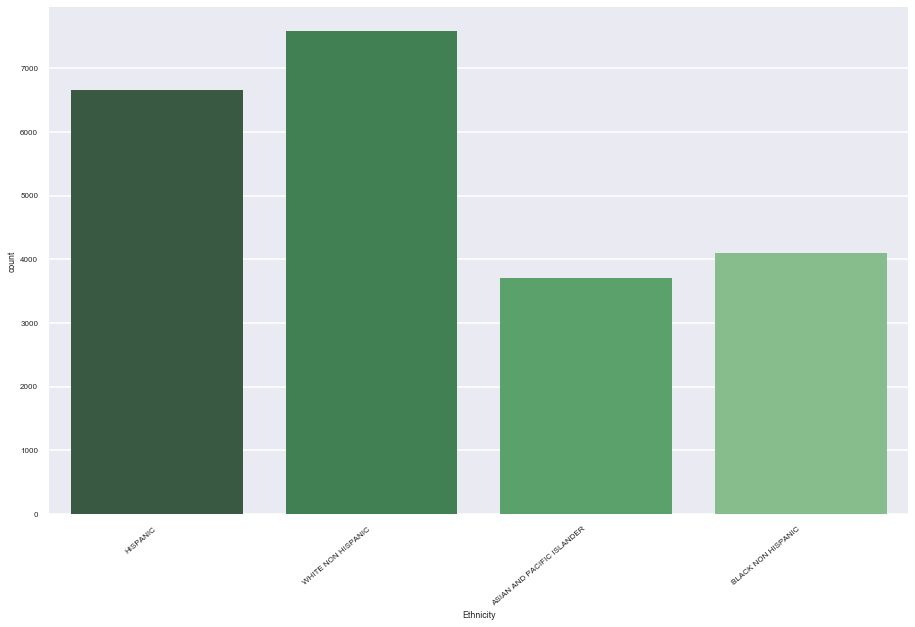

In [218]:
eth = sns.countplot(x="Ethnicity", data=names, palette="Greens_d");
eth.set_xticklabels(eth.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [219]:
boys = names[names['Gender'] == 'MALE']
boys.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
546,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARAV,15,51
547,2011,MALE,ASIAN AND PACIFIC ISLANDER,AARON,51,19
548,2011,MALE,ASIAN AND PACIFIC ISLANDER,ABDUL,20,46
549,2011,MALE,ASIAN AND PACIFIC ISLANDER,ABDULLAH,30,36
550,2011,MALE,ASIAN AND PACIFIC ISLANDER,ADAM,28,38


In [220]:
girls = names[names['Gender'] == 'FEMALE']
girls.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


In [221]:
sns.set_context("poster",font_scale=0.5)
b_plt = sns.countplot(x="Child's First Name", data=boys, palette="Greens_d",order=boys["Child's First Name"].value_counts().iloc[:70].index);
b_plt.set_xticklabels(b_plt.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
#plt.show()

In [222]:
sns.set_context("poster",font_scale=0.5)
g_plt = sns.countplot(x="Child's First Name", data=girls, palette="Greens_d",order=girls["Child's First Name"].value_counts().iloc[:70].index);
g_plt.set_xticklabels(g_plt.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
#plt.show()

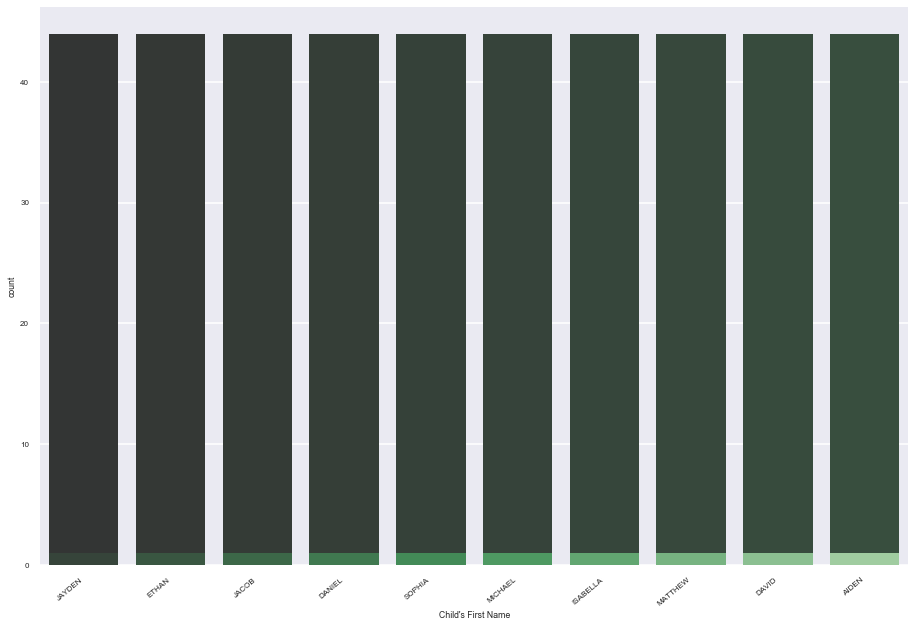

In [223]:
sns.set_context("poster",font_scale=0.5)
c_plt = sns.countplot(x =count_df.index.values,data=count_df, palette="Greens_d",order=count_df["Count"].iloc[:10].index);
c_plt.set_xticklabels(c_plt.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()